In [4]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

refImg = 'tests/data/20230714235848.jpg'
flowers = 'tests/data/Diopsis-flower-screen.jpg'

image = cv2.imread(flowers)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

edged = cv2.Canny(blurred, 0, 70)

In [31]:
img_f = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edge_f = cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)

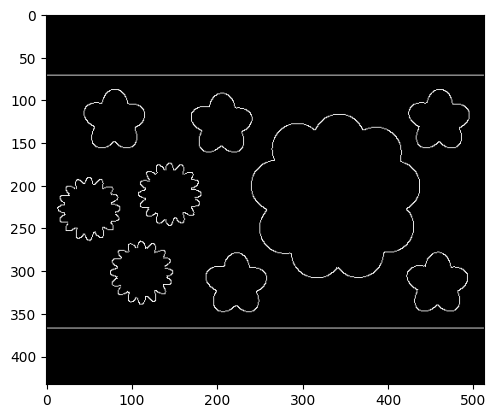

In [32]:
plt.imshow(edge_f)
plt.show()

In [165]:
# find the contours in the edged image
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")

509 objects were found in this image.


In [166]:
img_c_f = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

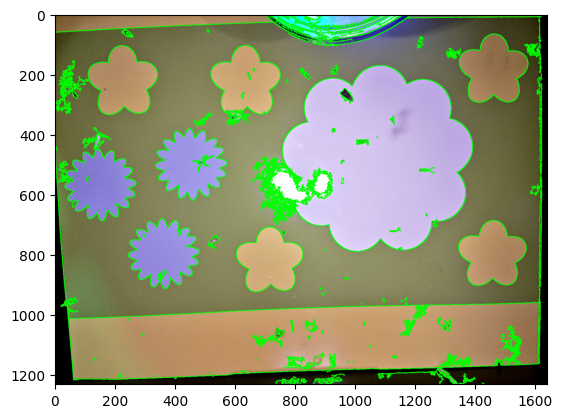

In [167]:
plt.imshow(img_c_f)
plt.show()

In [259]:
image = cv2.imread(refImg)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# edged = cv2.Canny(blurred, 10, 100)
edged = cv2.Canny(blurred, 0, 70) # this is the original flowers line

# define a (3, 3) structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# apply the dilation operation to the edged image
dilate = cv2.dilate(edged, kernel, iterations=1)

# find the contours in the dilated image
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")

img_d_f = cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB)
cv2.fillPoly(img_d_f, pts = contours, color=(255,255,255))
img_con_f = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

36 objects were found in this image.


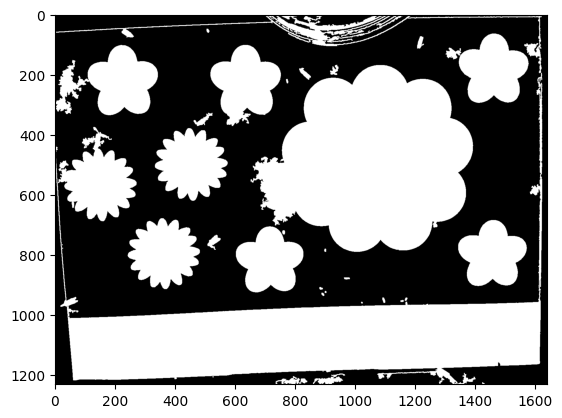

In [260]:
plt.imshow(img_d_f)
plt.show()

In [261]:
canny1= img_d_f

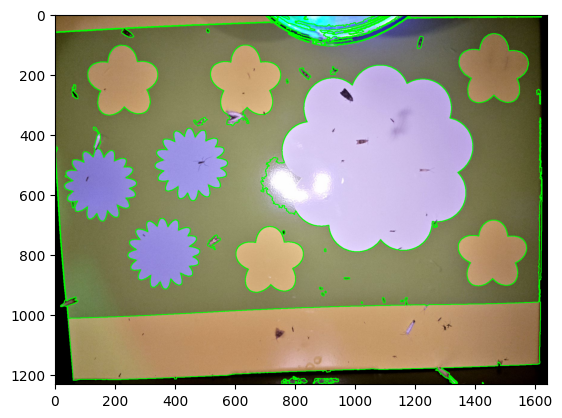

In [30]:
plt.imshow(img_con_f)
plt.show()

In [11]:
image1 = cv2.imread(refImg)
image2 = cv2.imread(flowers)

In [12]:
import numpy as np
import cv2

def findHomography(img1, img2):

    # define constants
    MIN_MATCH_COUNT = 10
    MIN_DIST_THRESHOLD = 0.7
    RANSAC_REPROJ_THRESHOLD = 5.0

    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # find matches
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < MIN_DIST_THRESHOLD * n.distance:
            good.append(m)


    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, RANSAC_REPROJ_THRESHOLD)
        return H

    else: print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))

In [13]:
H = findHomography(image2, image1)

In [14]:
corrected_image = cv2.warpPerspective(image2, H, (image2.shape[1], image2.shape[0]))

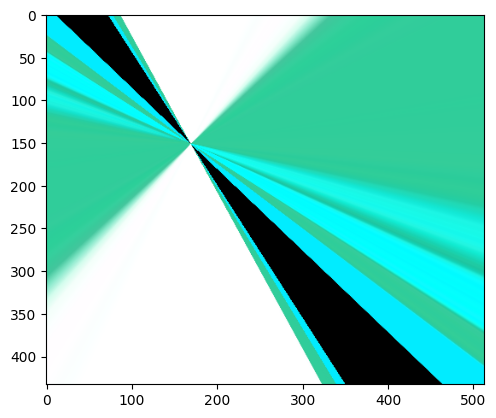

In [15]:
plt.imshow(corrected_image)
plt.show()

In [17]:
import cv2 as cv2
import matplotlib.pyplot as plt
 
# read the image
image = cv2.imread('tests/data/20230714235848.jpg')

In [18]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

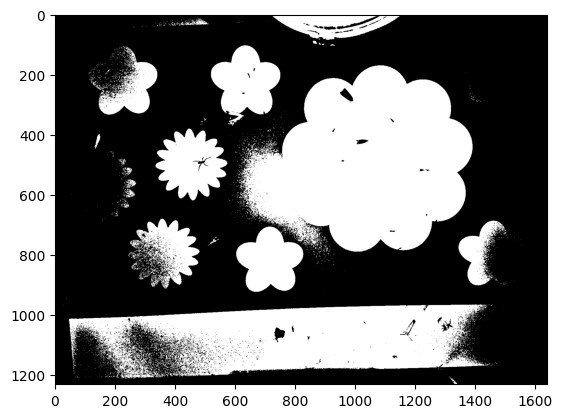

In [21]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image

thresh1 = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(thresh1)
plt.show()

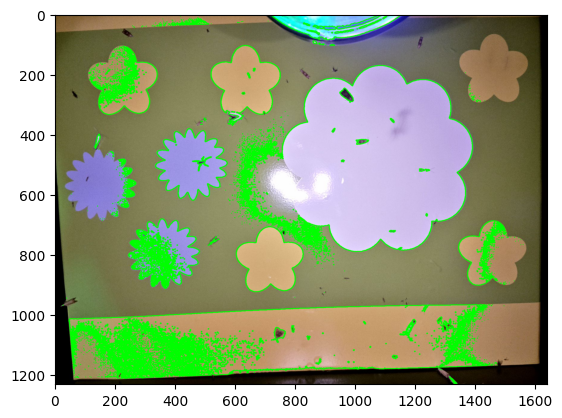

In [20]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)
plt.show()

Not enough matches are found - 7/7


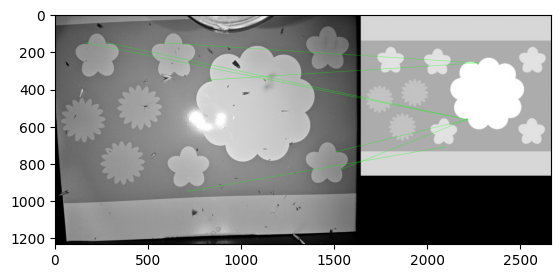

UnboundLocalError: cannot access local variable 'warped_image' where it is not associated with a value

In [20]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv


def feature_match(scanned_image, template_image, MIN_MATCH_COUNT=10, dist_thresh=0.2, RANSAC=10.0):
    # Initiate SIFT detector
    sift = cv.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(scanned_image, None)
    kp2, des2 = sift.detectAndCompute(template_image, None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < dist_thresh * n.distance:
            good.append(m)

    # Do we have enough?
    if len(good) > MIN_MATCH_COUNT:
        print("%s good matches using distance threshold of %s" % (len(good), dist_thresh))
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, RANSAC)
        matchesMask = mask.ravel().tolist()

        # Apply warp perspective based on homography matrix
        warped_image = cv.warpPerspective(scanned_image, M, (scanned_image.shape[1], scanned_image.shape[0]))
        plt.imshow(warped_image, 'gray'), plt.show()

    else:
        print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
        matchesMask = None

    # Show quality of matches
    draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                       singlePointColor=None,
                       matchesMask=matchesMask,  # draw only inliers
                       flags=2)
    match_quality = cv.drawMatches(scanned_image, kp1, template_image, kp2, good, None, **draw_params)
    plt.imshow(match_quality, 'gray'), plt.show()

    cv.imwrite(r"img1.png", cv.cvtColor(img1, cv.COLOR_GRAY2RGB))
    cv.imwrite(r"img2.png", cv.cvtColor(img2, cv.COLOR_GRAY2RGB))
    cv.imwrite(r"warped_image.png", cv.cvtColor(warped_image, cv.COLOR_GRAY2RGB))

iii = 'DIOPSIS_test_images/2023-07-15/756/20230715000021.jpg'
ooo = 'DIOPSIS_test_images/2023-08-27/761/20230827120654.jpg'

# Load images
img1_path = refImg
img2_path = flowers
# img1_path = ooo
# img2_path = iii

img1 = cv.imread(img1_path)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

img2 = cv.imread(img2_path)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# upscaling img2 to the final scale I'm ultimately after; saves an upscale
img2 = cv.resize(img2, (img2.shape[1] * 2, img2.shape[0] * 2), cv.IMREAD_UNCHANGED)

feature_match(scanned_image=img1, template_image=img2, MIN_MATCH_COUNT=7, dist_thresh=0.7)

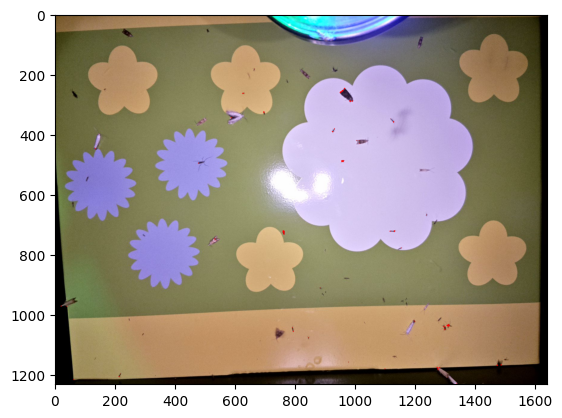

In [59]:
import cv2
import numpy as np


img = cv2.imread(refImg)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,5,3,0.04)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# for i in range(1, len(corners)):
    # print(corners[i])
img[dst>0.1*dst.max()]=[0,0,255]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

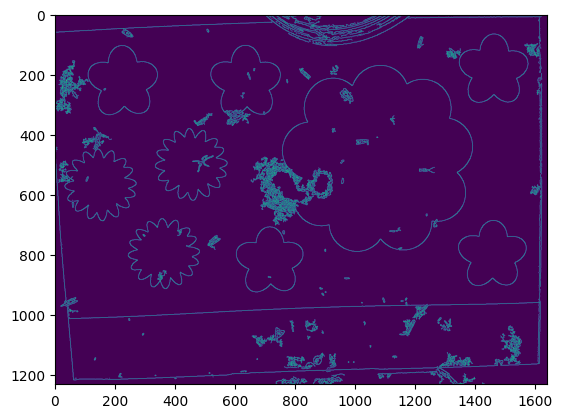

In [78]:
plt.imshow(thresh)

In [91]:
import numpy as np
import cv2 as cv2

im = cv2.imread(flowers)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

edged = cv2.Canny(blurred, 0, 70)

ret, thresh = cv2.threshold(edged, 127, 255, 0)
im2, contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im, im2, -1, (0,255,0), 3)

array([[[ 77, 210, 167],
        [ 62, 206, 158],
        [ 63, 207, 159],
        ...,
        [ 63, 207, 159],
        [ 62, 206, 158],
        [ 77, 211, 165]],

       [[ 65, 207, 160],
        [ 50, 202, 153],
        [ 51, 204, 153],
        ...,
        [ 51, 204, 153],
        [ 51, 204, 153],
        [ 65, 207, 160]],

       [[ 65, 207, 160],
        [ 51, 204, 153],
        [ 51, 204, 153],
        ...,
        [ 52, 205, 154],
        [ 52, 205, 154],
        [ 65, 207, 160]],

       ...,

       [[ 65, 207, 160],
        [ 51, 204, 153],
        [ 51, 204, 153],
        ...,
        [ 52, 205, 154],
        [ 52, 205, 154],
        [ 65, 207, 160]],

       [[ 65, 207, 160],
        [ 50, 202, 153],
        [ 51, 204, 153],
        ...,
        [ 51, 204, 153],
        [ 51, 204, 153],
        [ 65, 207, 160]],

       [[ 77, 210, 167],
        [ 62, 206, 158],
        [ 63, 207, 159],
        ...,
        [ 63, 207, 159],
        [ 62, 206, 158],
        [ 77, 211, 165]]

In [94]:
contours.shape

(1, 27, 4)

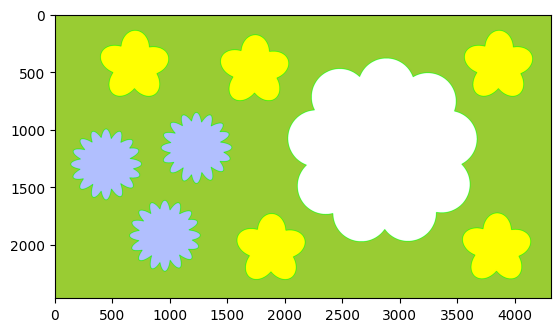

In [95]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [100]:
img = cv2.imread(refImg)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
background = cv2.imread(flowers)
background = cv2.cvtColor(background,cv2.COLOR_BGR2RGB)

rows,cols,ch = background.shape

pts1 = np.float32([[0,0],[974,0],[0,974],[974,974]]) # cola coords 
pts2 = np.float32([[560,383],[940, 516],[5,527],[298,733]]) # stadium tile coords

M = cv2.getPerspectiveTransform(pts1,pts2)    
dst = cv2.warpPerspective(img,M,(cols,rows))

overlay = cv2.add(background, dst)

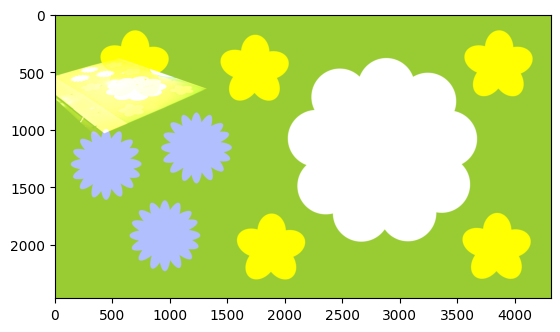

In [106]:
plt.imshow(overlay)

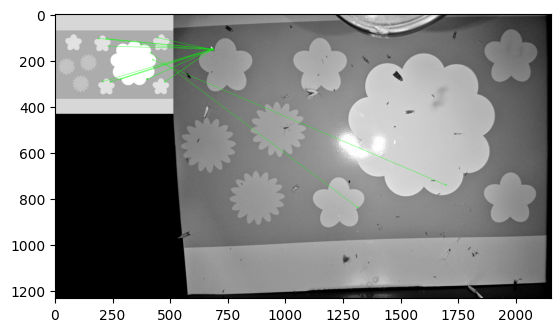

(<matplotlib.image.AxesImage at 0x15d13ad90>, None)

In [22]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt 

MIN_MATCH_COUNT = 10

img1 = cv2.imread(flowers,0)          # queryImage
img2 = cv2.imread(refImg,0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0 
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50) 

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
        if m.distance < 0.7*n.distance:
                    good.append(m)

if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

In [129]:
iii = 'DIOPSIS_test_images/2023-07-15/756/20230715000021.jpg'
ooo = 'DIOPSIS_test_images/2023-08-27/761/20230827120654.jpg'

531 matches


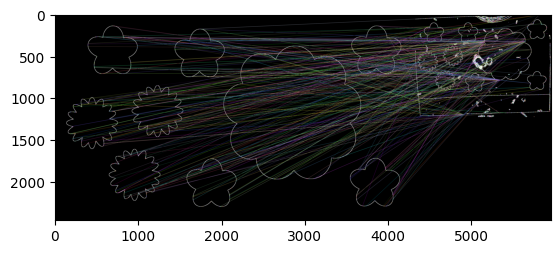

In [184]:
# Open and show images
img1 = cv2.imread(ooo)
img2 = cv2.imread(refImg)
img1 = canny2
img2 = canny1

# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [136]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

print (src_pts[:3])
print (dst_pts[:3])

[[[ 569.4997   732.32855]]

 [[1049.5417   996.4037 ]]

 [[1395.4495   665.05566]]]
[[[ 627.63824  263.78375]]

 [[ 746.34393 1064.8383 ]]

 [[ 665.804    898.4817 ]]]


In [137]:
# Find homography matrix with RANSAC algorithm
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()
print(M)

[[-4.23554632e-01  5.46235465e-02  1.26560832e+03]
 [-2.66058813e-01  1.43008385e-01  6.53878158e+02]
 [-2.19898787e-04 -8.93835691e-05  1.00000000e+00]]


In [138]:
# Calculate the object position in the scene using homography
h,w = img1.shape[0:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
print(dst)

[[[1265.6083   653.8782 ]]

 [[1795.4083  1290.1328 ]]

 [[ 192.35461 2273.8203 ]]

 [[-441.75116 -783.3921 ]]]


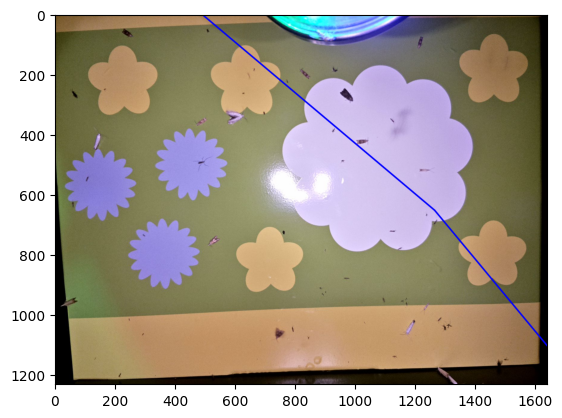

In [139]:
# Display the object
img2 = cv2.polylines(img2,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

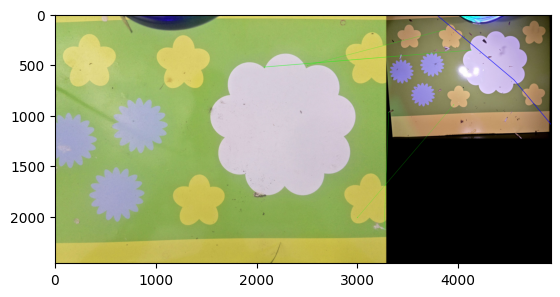

In [140]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches,None,**draw_params)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [3]:
import cv2 
import numpy as np 
  
# Open the image files. 
img1_color = cv2.imread(flowers)  # Image to be aligned. 
img2_color = cv2.imread(refImg)    # Reference image. 
  
# Convert to grayscale. 
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 
  
# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 
  
# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not required in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 
  
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 

matches = list(matches)
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*0.9)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
  p1[i, :] = kp1[matches[i].queryIdx].pt 
  p2[i, :] = kp2[matches[i].trainIdx].pt 
  
# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height)) 
  
# Save the output. 
# cv2.imwrite('output.jpg', transformed_img)
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))

NameError: name 'flowers' is not defined

In [1]:
import cv2 
import numpy as np 
  
# Open the image files. 
# img1_color = cv2.imread(flowers)  # Image to be aligned. 
# img2_color = cv2.imread(refImg)    # Reference image. 
  
# Convert to grayscale. 
img1 = cv2.cvtColor(canny1, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(canny2, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 
  
# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 
  
# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not required in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 
  
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 

matches = list(matches)
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*0.9)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
  p1[i, :] = kp1[matches[i].queryIdx].pt 
  p2[i, :] = kp2[matches[i].trainIdx].pt 
  
# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height)) 
  
# Save the output. 
# cv2.imwrite('output.jpg', transformed_img)
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))

NameError: name 'canny1' is not defined

# templateMatching

In [269]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

img_rgb = cv2.imread(refImg)
img_gray = cv2.cvtColor(canny1, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
h, w = template.shape[::]
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_rgb, top_left, bottom_right, (0,0,255), 2)

array([[[ 29,  74, 107],
        [ 26,  71, 104],
        [ 32,  77, 110],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 40,  85, 118],
        [ 34,  79, 112],
        [ 28,  73, 106],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 37,  82, 115],
        [ 39,  84, 117],
        [ 31,  76, 109],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

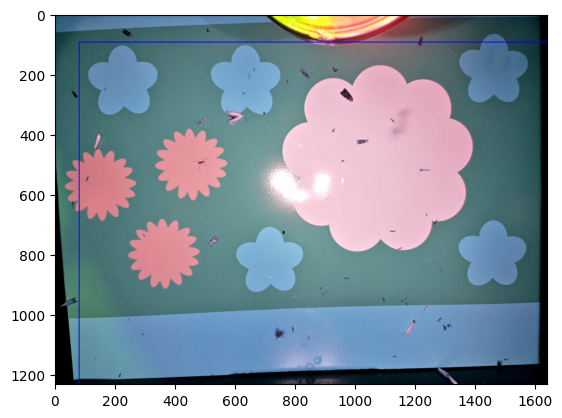

In [270]:
plt.imshow(img_rgb)

31881696

In [248]:
sample_test = canny2

True

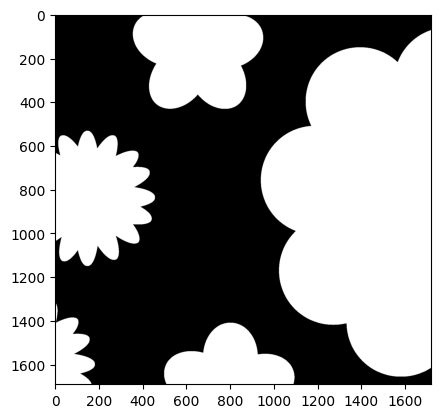

In [277]:
sample_test = canny2
crop_img = sample_test[320:2010, 1080:2800]
plt.imshow(crop_img)
# cv2.imwrite('tests/data/template.jpg', crop_img)

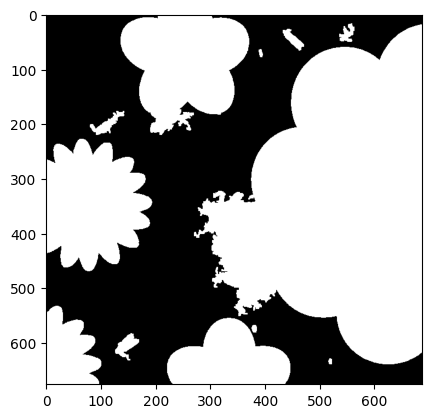

In [320]:
sample_test = canny1
crop_img2 = sample_test[152:828, 382:1070]
# crop_img2 = sample_test[37:974, 0:1640]
plt.imshow(crop_img2)
# cv2.imwrite('tests/data/whole.jpg', crop_img)

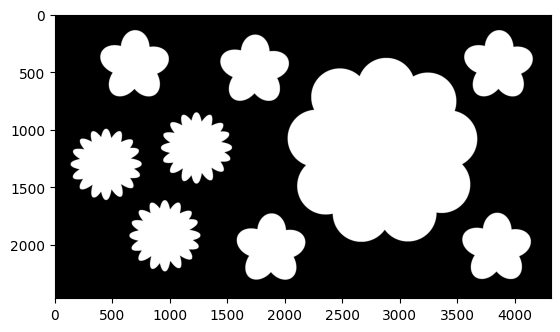

In [295]:
sample_test = canny2
crop_img = canny2
plt.imshow(crop_img)

In [296]:
crop_img2.shape

(937, 1640, 3)

In [297]:
crop_img.shape

(2464, 4313, 3)

In [298]:
2464/937

2.629669156883671

In [299]:
4313/1640

2.629878048780488

In [301]:
crop_small = cv2.resize(crop_img, (1640, 937))

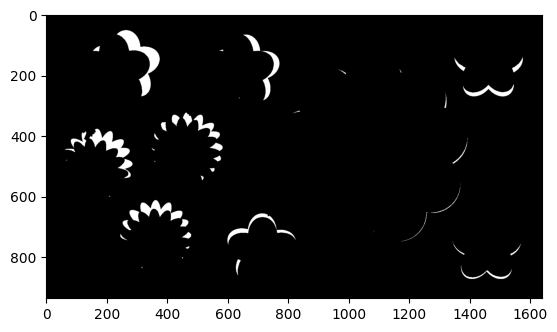

In [319]:
plt.imshow(cv2.subtract(crop_small, crop_img2))

In [2]:
plt.imshow(canny1)

NameError: name 'plt' is not defined

# Homography test with manual point selection
# First try

In [333]:
src = canny2.copy()
# src = cv.imread('tests/data/flowers.jpg', -1)
src_copy = src.copy()

dst = canny1.copy()
# dst = cv.imread('tests/data/20230714235848.jpg', -1)
dst_copy = dst.copy()

src_list = [[822, 290], [2250, 830], [999, 1696], [2006, 1878]]
dst_list = [[274, 162], [843, 361], [377, 713], [763, 764]]

src_pts = np.array(src_list).reshape(-1,1,2)
dst_pts = np.array(dst_list).reshape(-1,1,2)
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
print("H:")
print(H)
plan_view = cv.warpPerspective(src, H, (dst.shape[1], dst.shape[0]))

H:
[[ 4.13209344e-01  3.28520379e-02 -7.00612880e+01]
 [-8.27825404e-03  4.19634880e-01  5.01400591e+01]
 [ 1.37760123e-05  2.54359454e-05  1.00000000e+00]]


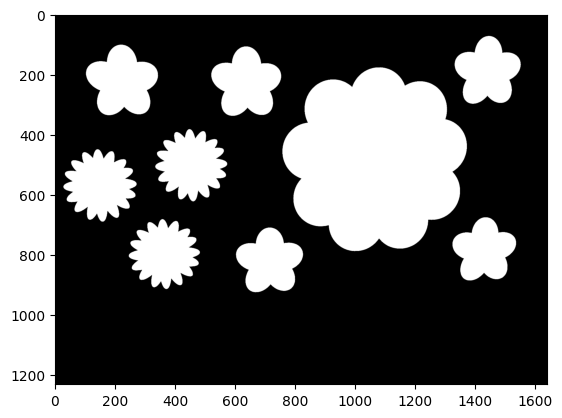

In [334]:
plt.imshow(cv2.cvtColor(plan_view, cv2.COLOR_BGR2RGB))

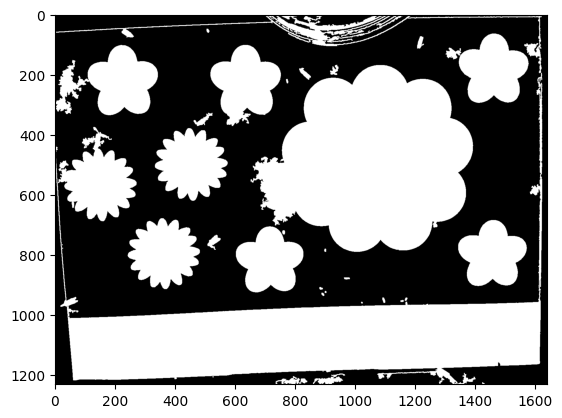

In [335]:
plt.imshow(cv2.cvtColor(dst_copy, cv2.COLOR_BGR2RGB))

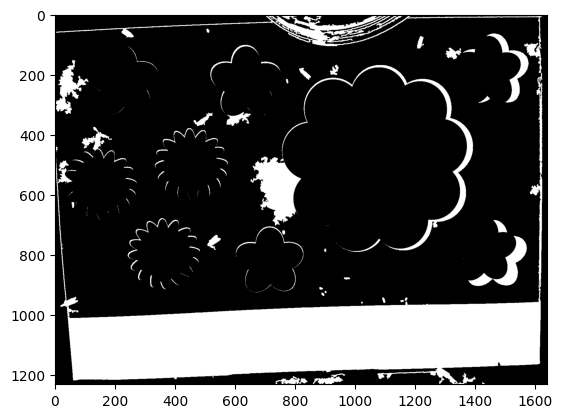

In [339]:
plt.imshow(cv2.subtract(dst, plan_view))

# Homography test with manual point selection
# Second try

In [23]:
# src = canny2.copy()
src = cv.imread(flowers, -1)
src_copy = src.copy()

# dst = canny1.copy()
dst = cv.imread(refImg, -1)
dst_copy = dst.copy()

src_list = [[66, 105], [207, 156], [416, 173], [483, 326], [3, 369]]
dst_list = [[179, 164], [641, 311], [1317, 349], [1534, 832], [46, 1017]]

src_pts = np.array(src_list).reshape(-1,1,2)
dst_pts = np.array(dst_list).reshape(-1,1,2)
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
print("H:")
print(H)
plan_view = cv.warpPerspective(src, H, (dst.shape[1], dst.shape[0]))

H:
[[ 3.25434202e+00  2.76818366e-01 -5.99623472e+01]
 [-2.55253096e-01  3.65117991e+00 -1.98046820e+02]
 [-1.45308311e-04  3.51520469e-04  1.00000000e+00]]


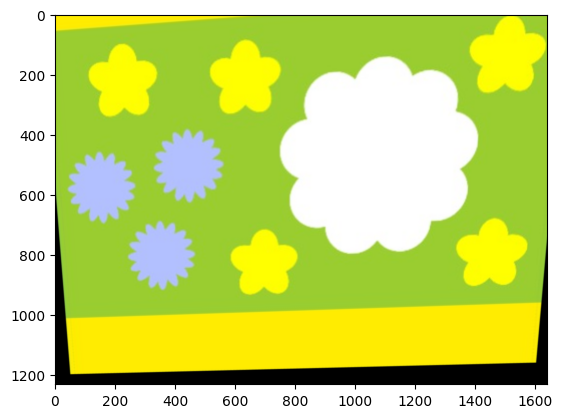

In [24]:
plt.imshow(cv2.cvtColor(plan_view, cv2.COLOR_BGR2RGB))

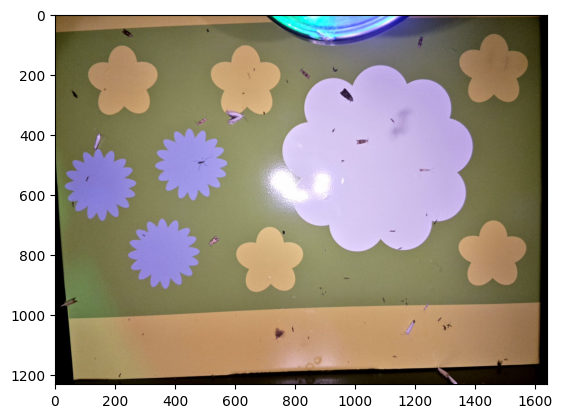

In [25]:
plt.imshow(cv2.cvtColor(dst_copy, cv2.COLOR_BGR2RGB))

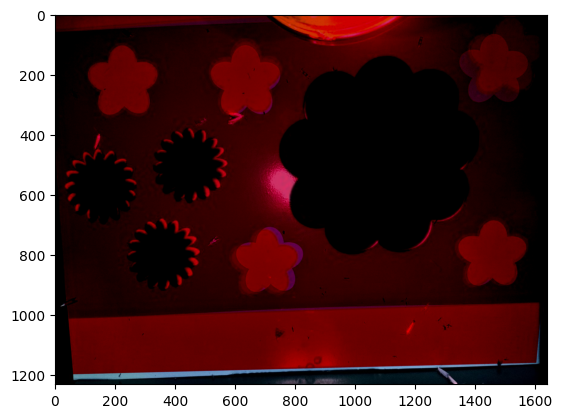

In [26]:
plt.imshow(cv2.subtract(dst, plan_view))

# Reinhard Color Transfer before finding matches

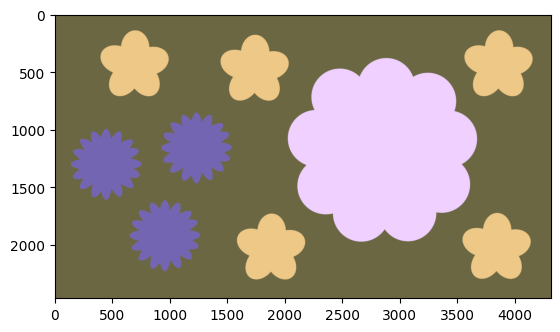

In [71]:
# https://youtu.be/_GAhbrGHaVo
"""
Reinhard color transfer 
Based on the paper: https://www.cs.tau.ac.il/~turkel/imagepapers/ColorTransfer.pdf

This approach is suitable for stain normalization of pathology images where
the 'look and feel' of all images can be normalized to a template image. 
This can be a good preprocessing step for machine learning and deep learning 
of pathology images. 

"""

def get_mean_and_std(x):
	x_mean, x_std = cv2.meanStdDev(x)
	x_mean = np.hstack(np.around(x_mean,2))
	x_std = np.hstack(np.around(x_std,2))
	return x_mean, x_std

#template_img = cv2.imread('template_images/sunset_template.jpg')
'tests/data/Diopsis-flower-screen.jpg'
'tests/data/20230714235848.jpg'
template_img = cv2.imread('tests/data/20230714235848.jpg')
template_img = cv2.cvtColor(template_img,cv2.COLOR_BGR2LAB)
template_mean, template_std = get_mean_and_std(template_img)

input_img = cv2.imread('tests/data/flowers.jpg')
input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2LAB)


img_mean, img_std = get_mean_and_std(input_img)


height, width, channel = input_img.shape
for i in range(0,height):
    for j in range(0,width):
        for k in range(0,channel):
            x = input_img[i,j,k]
            x = ((x-img_mean[k])*(template_std[k]/img_std[k]))+template_mean[k]
            x = round(x)
            # boundary check
            x = 0 if x<0 else x
            x = 255 if x>255 else x
            input_img[i,j,k] = x
        
input_img= cv2.cvtColor(input_img,cv2.COLOR_LAB2RGB)
plt.imshow(input_img)


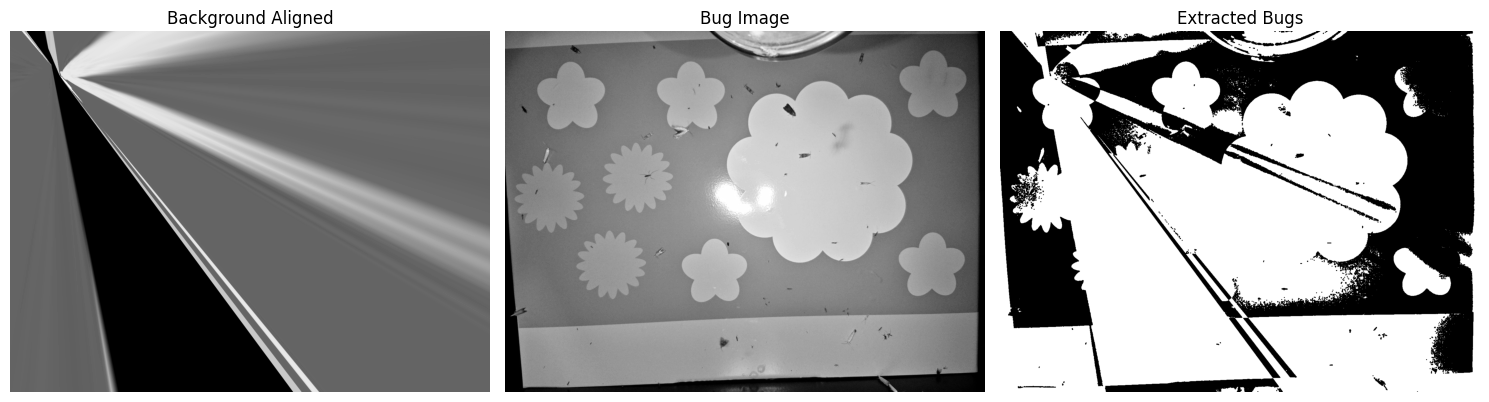

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import color

def reinhard_color_transfer(source, target):
    """
    Transfers the color distribution from the target to the source
    image using the Reinhard color transfer algorithm.
    """
    def get_mean_and_std(x):
        x_mean, x_std = cv2.meanStdDev(x)
        x_mean = np.hstack(np.around(x_mean,2))
        x_std = np.hstack(np.around(x_std,2))
        return x_mean, x_std

    #template_img = cv2.imread('template_images/sunset_template.jpg')
    'tests/data/Diopsis-flower-screen.jpg'
    'tests/data/20230714235848.jpg'
    template_img = target.copy()
    template_img = cv2.cvtColor(template_img,cv2.COLOR_RGB2LAB)
    template_mean, template_std = get_mean_and_std(template_img)

    input_img = source.copy()
    input_img = cv2.cvtColor(input_img,cv2.COLOR_RGB2LAB)


    img_mean, img_std = get_mean_and_std(input_img)


    height, width, channel = input_img.shape
    for i in range(0,height):
        for j in range(0,width):
            for k in range(0,channel):
                x = input_img[i,j,k]
                x = ((x-img_mean[k])*(template_std[k]/img_std[k]))+template_mean[k]
                x = round(x)
                # boundary check
                x = 0 if x<0 else x
                x = 255 if x>255 else x
                input_img[i,j,k] = x
            
    input_img= cv2.cvtColor(input_img,cv2.COLOR_LAB2RGB)
    # plt.imshow(input_img)
    
    return input_img

# Load the images
background_img = cv2.imread('tests/data/Diopsis-flower-screen.jpg')
bug_img = cv2.imread('tests/data/20230714235848.jpg')

# Convert images to RGB
background_rgb = cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB)
bug_rgb = cv2.cvtColor(bug_img, cv2.COLOR_BGR2RGB)

# Apply Reinhard color transfer
background_transferred = reinhard_color_transfer(background_rgb, bug_rgb)

# Convert to grayscale for feature detection
background_gray = cv2.cvtColor(background_transferred, cv2.COLOR_RGB2GRAY)
bug_gray = cv2.cvtColor(bug_rgb, cv2.COLOR_RGB2GRAY)

# Use SIFT for feature detection
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(background_gray, None)
keypoints2, descriptors2 = sift.detectAndCompute(bug_gray, None)

# Match descriptors using FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Store only good matches using Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Extract location of good matches
if len(good_matches) > 10:
    points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
    points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

    for i, match in enumerate(good_matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    homography, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Warp the background image to align with the bug image
    height, width = bug_gray.shape
    background_aligned = cv2.warpPerspective(background_gray, homography, (width, height))

    # Subtract the background
    difference_img = cv2.absdiff(bug_gray, background_aligned)

    # Threshold the difference to get binary image
    _, thresh_img = cv2.threshold(difference_img, 50, 255, cv2.THRESH_BINARY)

    # Morphological operations to clean up the image
    kernel = np.ones((3, 3), np.uint8)
    cleaned_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Background Aligned')
    plt.imshow(background_aligned, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title('Bug Image')
    plt.imshow(bug_gray, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title('Extracted Bugs')
    plt.imshow(cleaned_img, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f'Not enough good matches found: ' + str(len(good_matches)))

# Hough Lines implementation for the homography

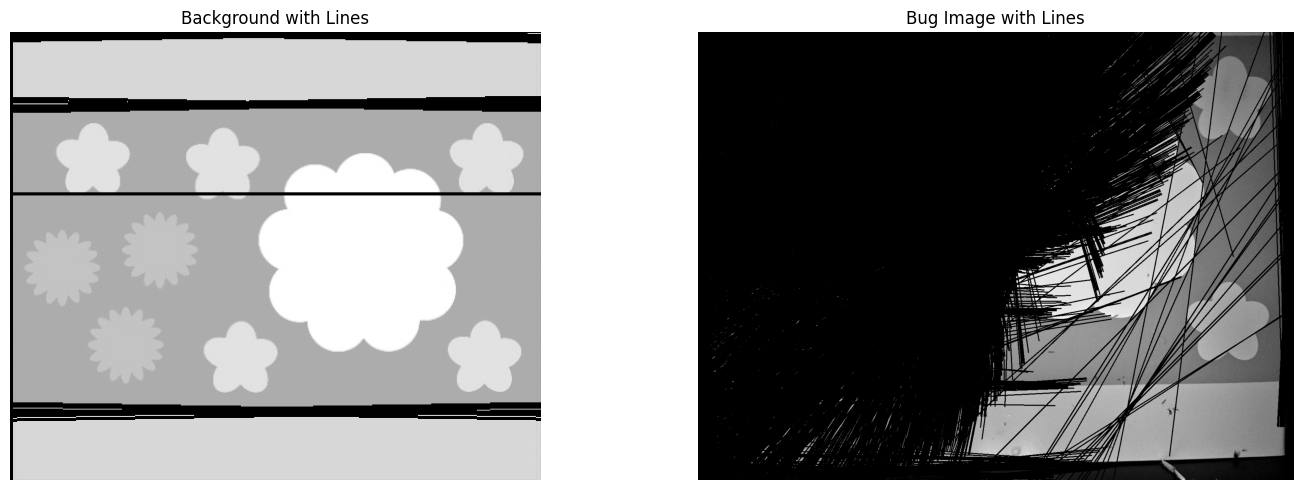

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_lines(image, threshold=50):
    """
    Detects lines in the image using the Canny edge detector and Hough Transform.
    """
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
    return lines

def draw_lines(image, lines):
    """
    Draws the detected lines on the image.
    """
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return image

# Load the images
background_img = cv2.imread('tests/data/Diopsis-flower-screen.jpg')
bug_img = cv2.imread('tests/data/20230714235848.jpg')

# Convert to grayscale
background_gray = cv2.cvtColor(background_img, cv2.COLOR_BGR2GRAY)
bug_gray = cv2.cvtColor(bug_img, cv2.COLOR_BGR2GRAY)

# Detect lines in both images
background_lines = detect_lines(background_gray)
bug_lines = detect_lines(bug_gray)

# Draw the detected lines on the images
background_with_lines = draw_lines(background_gray.copy(), background_lines)
bug_with_lines = draw_lines(bug_gray.copy(), bug_lines)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Background with Lines')
plt.imshow(background_with_lines, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Bug Image with Lines')
plt.imshow(bug_with_lines, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


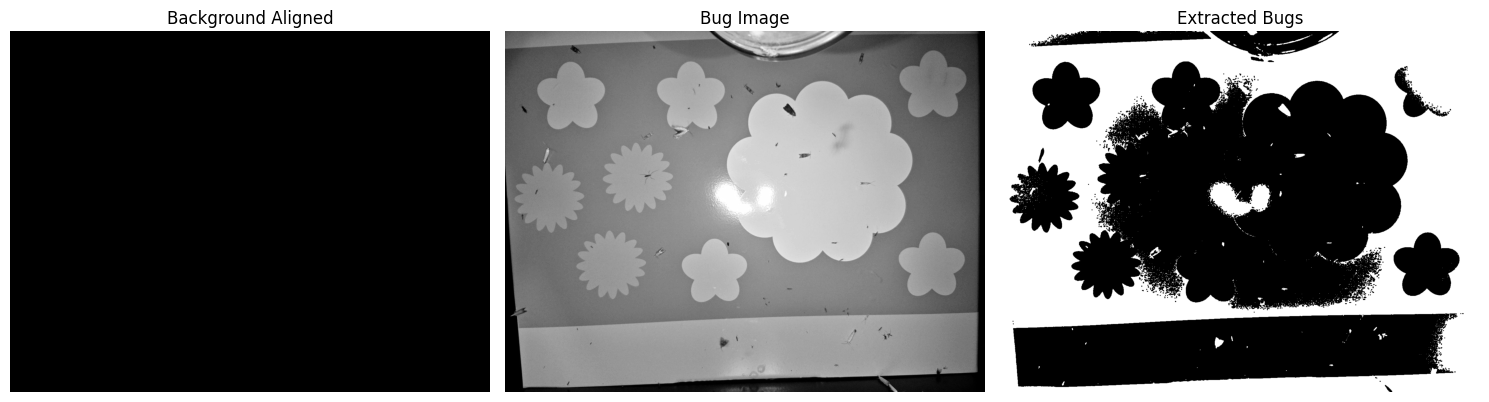

In [48]:
def find_intersections(lines, img_shape):
    """
    Find the intersection points of lines.
    """
    intersections = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            rho1, theta1 = lines[i][0]
            rho2, theta2 = lines[j][0]
            A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
            b = np.array([[rho1], [rho2]])
            try:
                x0, y0 = np.linalg.solve(A, b)
                if 0 <= x0 < img_shape[1] and 0 <= y0 < img_shape[0]:
                    intersections.append((x0, y0))
            except np.linalg.LinAlgError:
                pass
    return intersections

# Find intersections in both images
background_intersections = find_intersections(background_lines, background_gray.shape)
bug_intersections = find_intersections(bug_lines, bug_gray.shape)

# Convert to np.float32 arrays for homography computation
if len(background_intersections) >= 4 and len(bug_intersections) >= 4:
    background_intersections = np.array(background_intersections[:4], dtype=np.float32)
    bug_intersections = np.array(bug_intersections[:4], dtype=np.float32)
    
    # Compute homography
    homography, mask = cv2.findHomography(background_intersections, bug_intersections, cv2.RANSAC)
    
    # Warp the background image to align with the bug image
    height, width = bug_gray.shape
    background_aligned = cv2.warpPerspective(background_gray, homography, (width, height))
    
    # Subtract the background
    difference_img = cv2.absdiff(bug_gray, background_aligned)
    
    # Threshold the difference to get binary image
    _, thresh_img = cv2.threshold(difference_img, 50, 255, cv2.THRESH_BINARY)
    
    # Morphological operations to clean up the image
    kernel = np.ones((3, 3), np.uint8)
    cleaned_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)
    
    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Background Aligned')
    plt.imshow(background_aligned, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title('Bug Image')
    plt.imshow(bug_gray, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title('Extracted Bugs')
    plt.imshow(cleaned_img, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough intersections found.")


# Manual point selection

Select points in the background image.
Select points in the bug image.


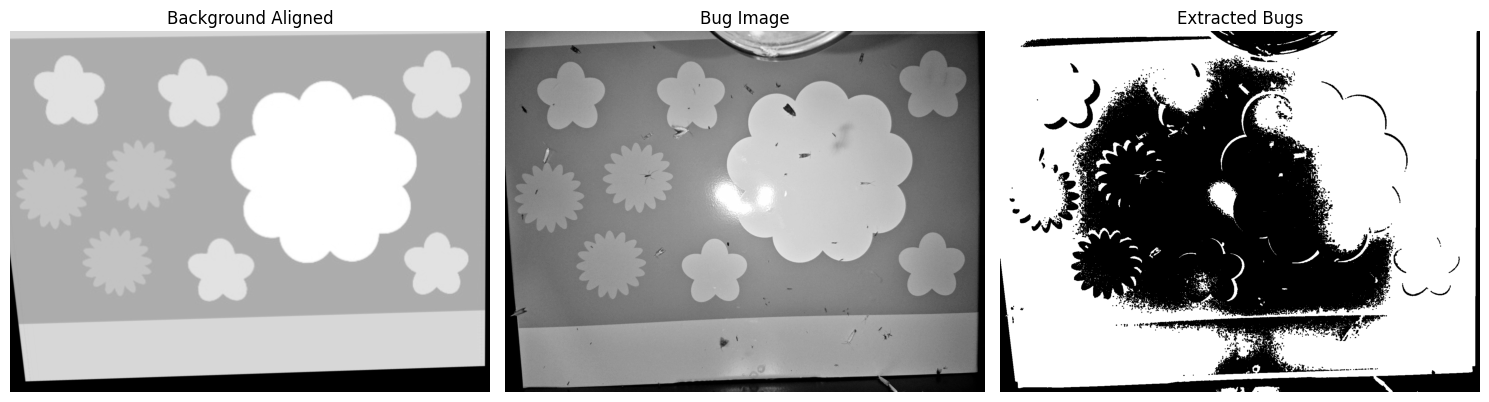

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images
background_img = cv2.imread('tests/data/Diopsis-flower-screen.jpg')
bug_img = cv2.imread('tests/data/20230714235848.jpg')

# Convert to grayscale
background_gray = cv2.cvtColor(background_img, cv2.COLOR_BGR2GRAY)
bug_gray = cv2.cvtColor(bug_img, cv2.COLOR_BGR2GRAY)

# Define a function to manually select points
def select_points(img):
    points = []

    def mouse_handler(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            points.append((x, y))
            cv2.circle(img, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow("Image", img)

    cv2.imshow("Image", img)
    cv2.setMouseCallback("Image", mouse_handler)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return points

# Make copies of images for point selection
background_for_selection = background_img.copy()
bug_for_selection = bug_img.copy()

# Select points in both images
print("Select points in the background image.")
background_points = select_points(background_for_selection)

print("Select points in the bug image.")
bug_points = select_points(bug_for_selection)

# Convert points to numpy arrays
background_points = np.array(background_points, dtype=np.float32)
bug_points = np.array(bug_points, dtype=np.float32)

# Compute homography
homography, mask = cv2.findHomography(background_points, bug_points, cv2.RANSAC)

# Warp the background image to align with the bug image
height, width = bug_gray.shape
background_aligned = cv2.warpPerspective(background_gray, homography, (width, height))

# Subtract the background
difference_img = cv2.absdiff(bug_gray, background_aligned)

# Threshold the difference to get binary image
_, thresh_img = cv2.threshold(difference_img, 50, 255, cv2.THRESH_BINARY)

# Morphological operations to clean up the image
kernel = np.ones((3, 3), np.uint8)
cleaned_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Background Aligned')
plt.imshow(background_aligned, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Bug Image')
plt.imshow(bug_gray, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Extracted Bugs')
plt.imshow(cleaned_img, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


# Match cloud shape contour

In [1]:
import imutils
import imutils.perspective as persp
import scipy.spatial.distance as dist

In [2]:
import cv2
import numpy as np

# Step 1: Read the image
image = cv2.imread('cloud_image.jpg')

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Step 5: Find Contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming you have a function to load or define the custom cloud shape contour
def get_custom_cloud_contour():
    # This function should return the contour of the custom cloud shape
    # For simplicity, assume we have it as a list of points
    return np.array([[0, 0], [100, 0], [100, 50], [50, 100], [0, 50]])

# Get the custom cloud shape contour
custom_cloud_contour = get_custom_cloud_contour()

# Step 6: Match Shapes
# Loop through detected contours and match them with the custom cloud shape
for contour in contours:
    match = cv2.matchShapes(custom_cloud_contour, contour, cv2.CONTOURS_MATCH_I1, 0.0)
    if match < 0.1:  # Adjust the threshold as needed
        # This contour matches the custom cloud shape
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display the result
cv2.imshow('Detected Cloud Shape', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


[ WARN:0@1.581] global loadsave.cpp:248 findDecoder imread_('cloud_image.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


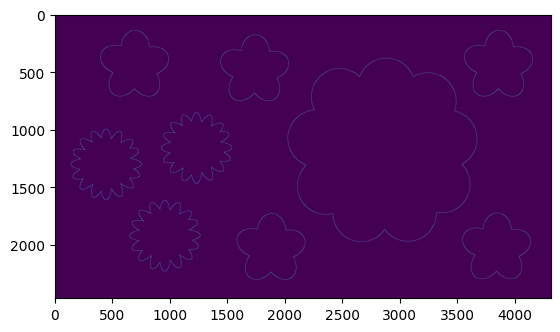

In [48]:
# Step 1: Read the image
# image = cv2.imread('tests/data/Diopsis-flower-screen.jpg')
image = cv2.imread('tests/data/flowers.jpg')

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Canny Edge Detection
edges = cv2.Canny(blurred,0, 12)

# Step 5: Find Contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(edges)

In [49]:
len(contours)

27

In [50]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [51]:
biggest_contour = sorted_contours[0]

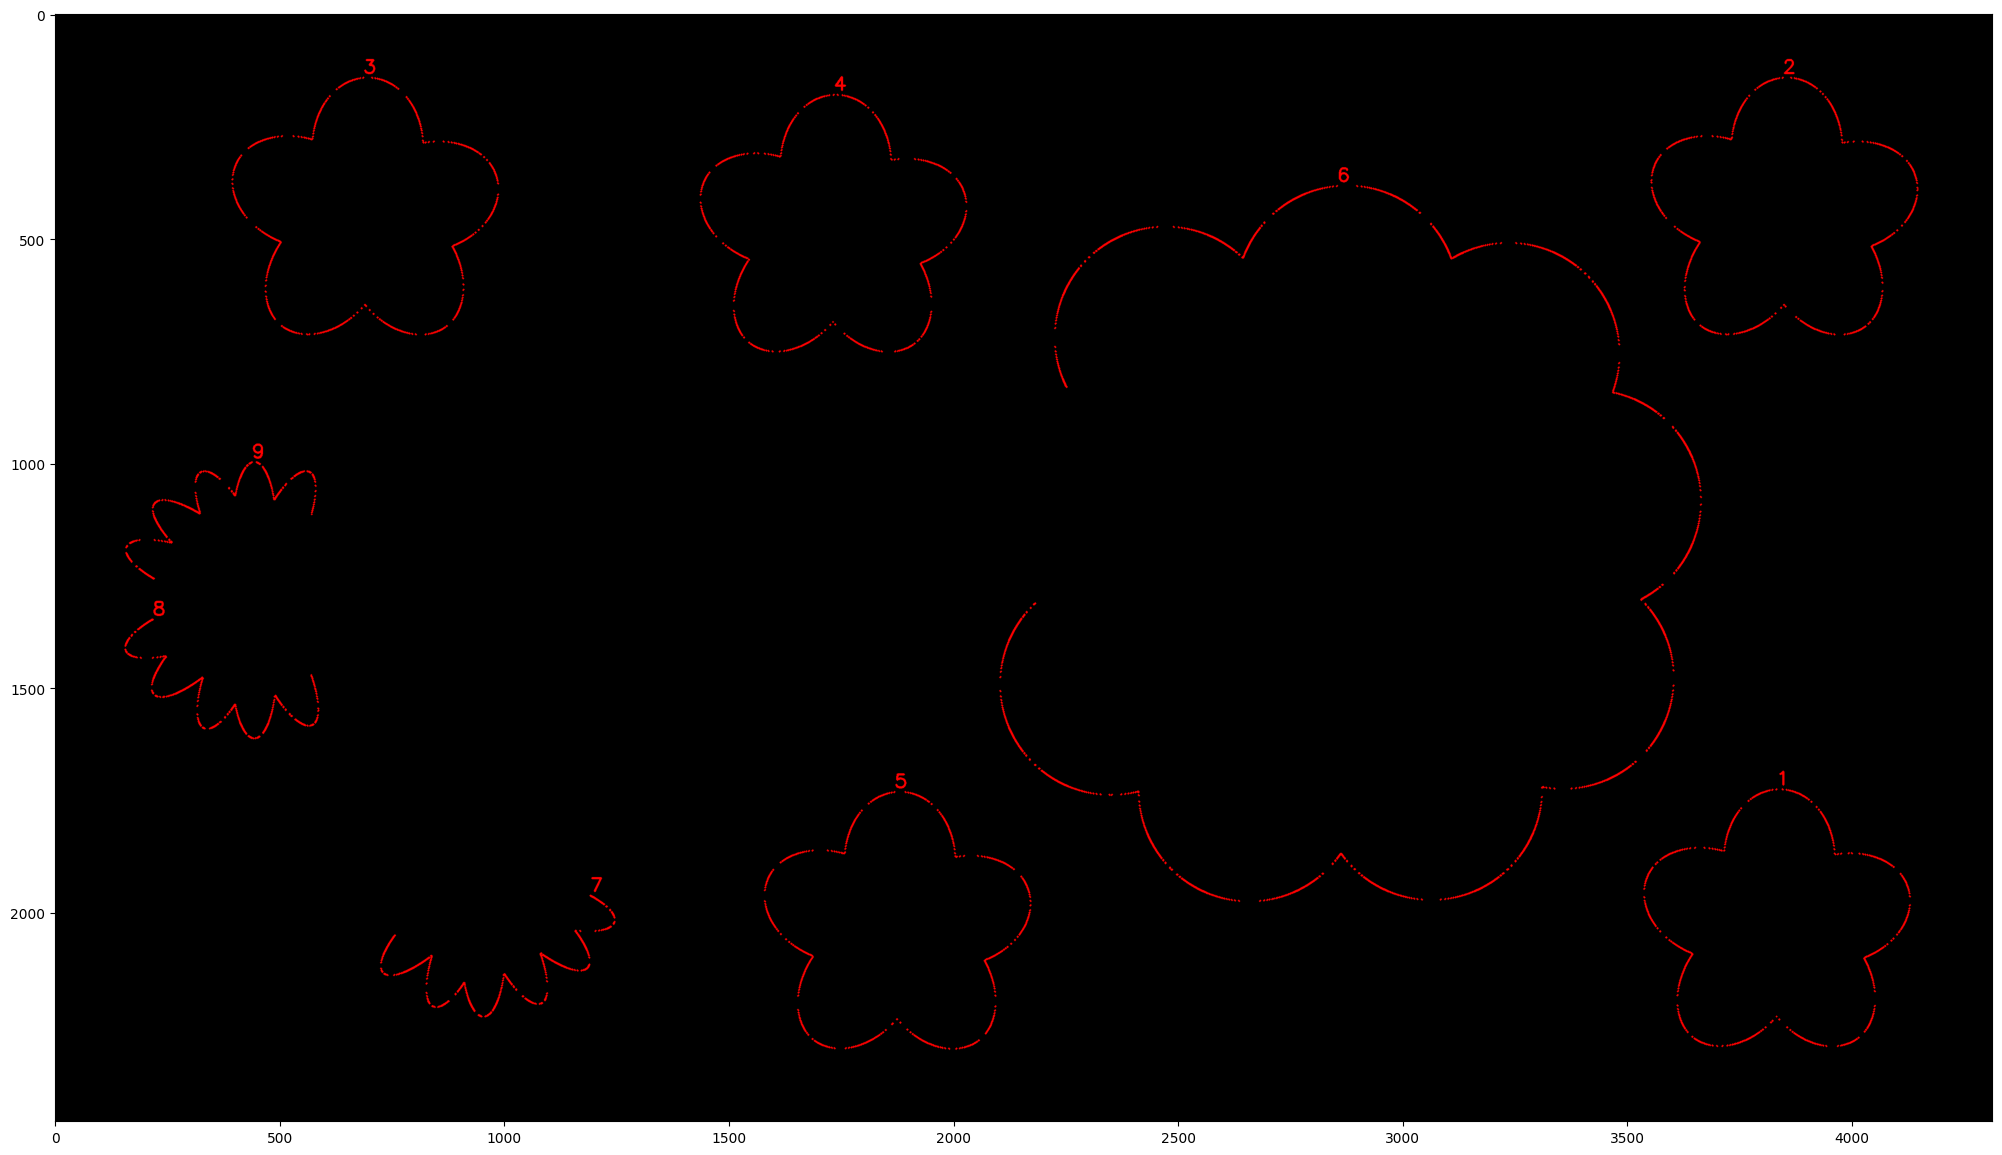

In [52]:
cont_image = np.zeros_like(image)
plt.figure(figsize=(25, 25))
for i, cont in enumerate(sorted_contours[:9], 1):
  cv2.drawContours(cont_image, cont, -1, (0, 0, 255), 4)
  cv2.putText(cont_image, str(i), (cont[0, 0, 0], cont[0, 0, 1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 4)
  plt.imshow(cont_image[:,:,::-1])

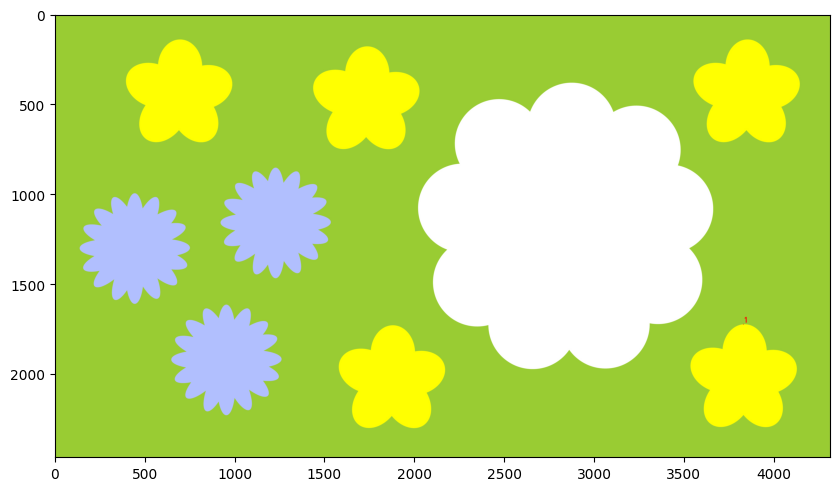

In [11]:
image_copy = image.copy()
cv2.drawContours(image_copy, biggest_contour, 0, (0, 0, 255), 4)
cv2.putText(image_copy, '1', (biggest_contour[0, 0, 0], biggest_contour[0, 0, 1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 4)
plt.figure(figsize=(10, 10))
plt.imshow(image_copy[:,:,::-1])

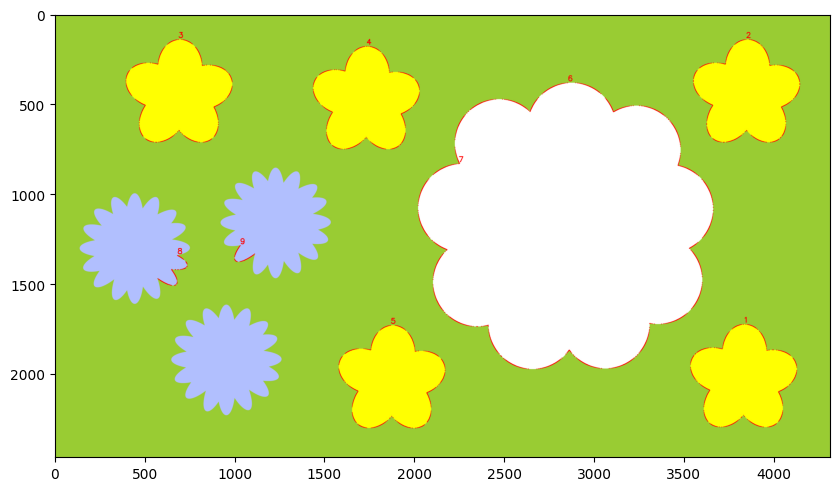

In [180]:
image_copy = image.copy()
plt.figure(figsize=(10, 10))
for i, cont in enumerate(sorted_contours[:9], 1):
  cv2.drawContours(image_copy, cont, -1, (0, 0, 255), 4)
  cv2.putText(image_copy, str(i), (cont[0, 0, 0], cont[0, 0, 1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 4)
  plt.imshow(image_copy[:,:,::-1])

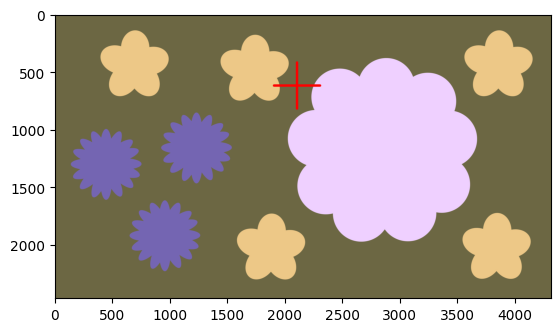

In [88]:
im1 = cv2.imread('tests/data/flowers.jpg')
im2 = input_img[:,:,::-1].copy()
im2 = cv2.drawMarker(im2, (2100, 620), (0, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=400, thickness=20)
plt.imshow(im2[:,:,::-1])

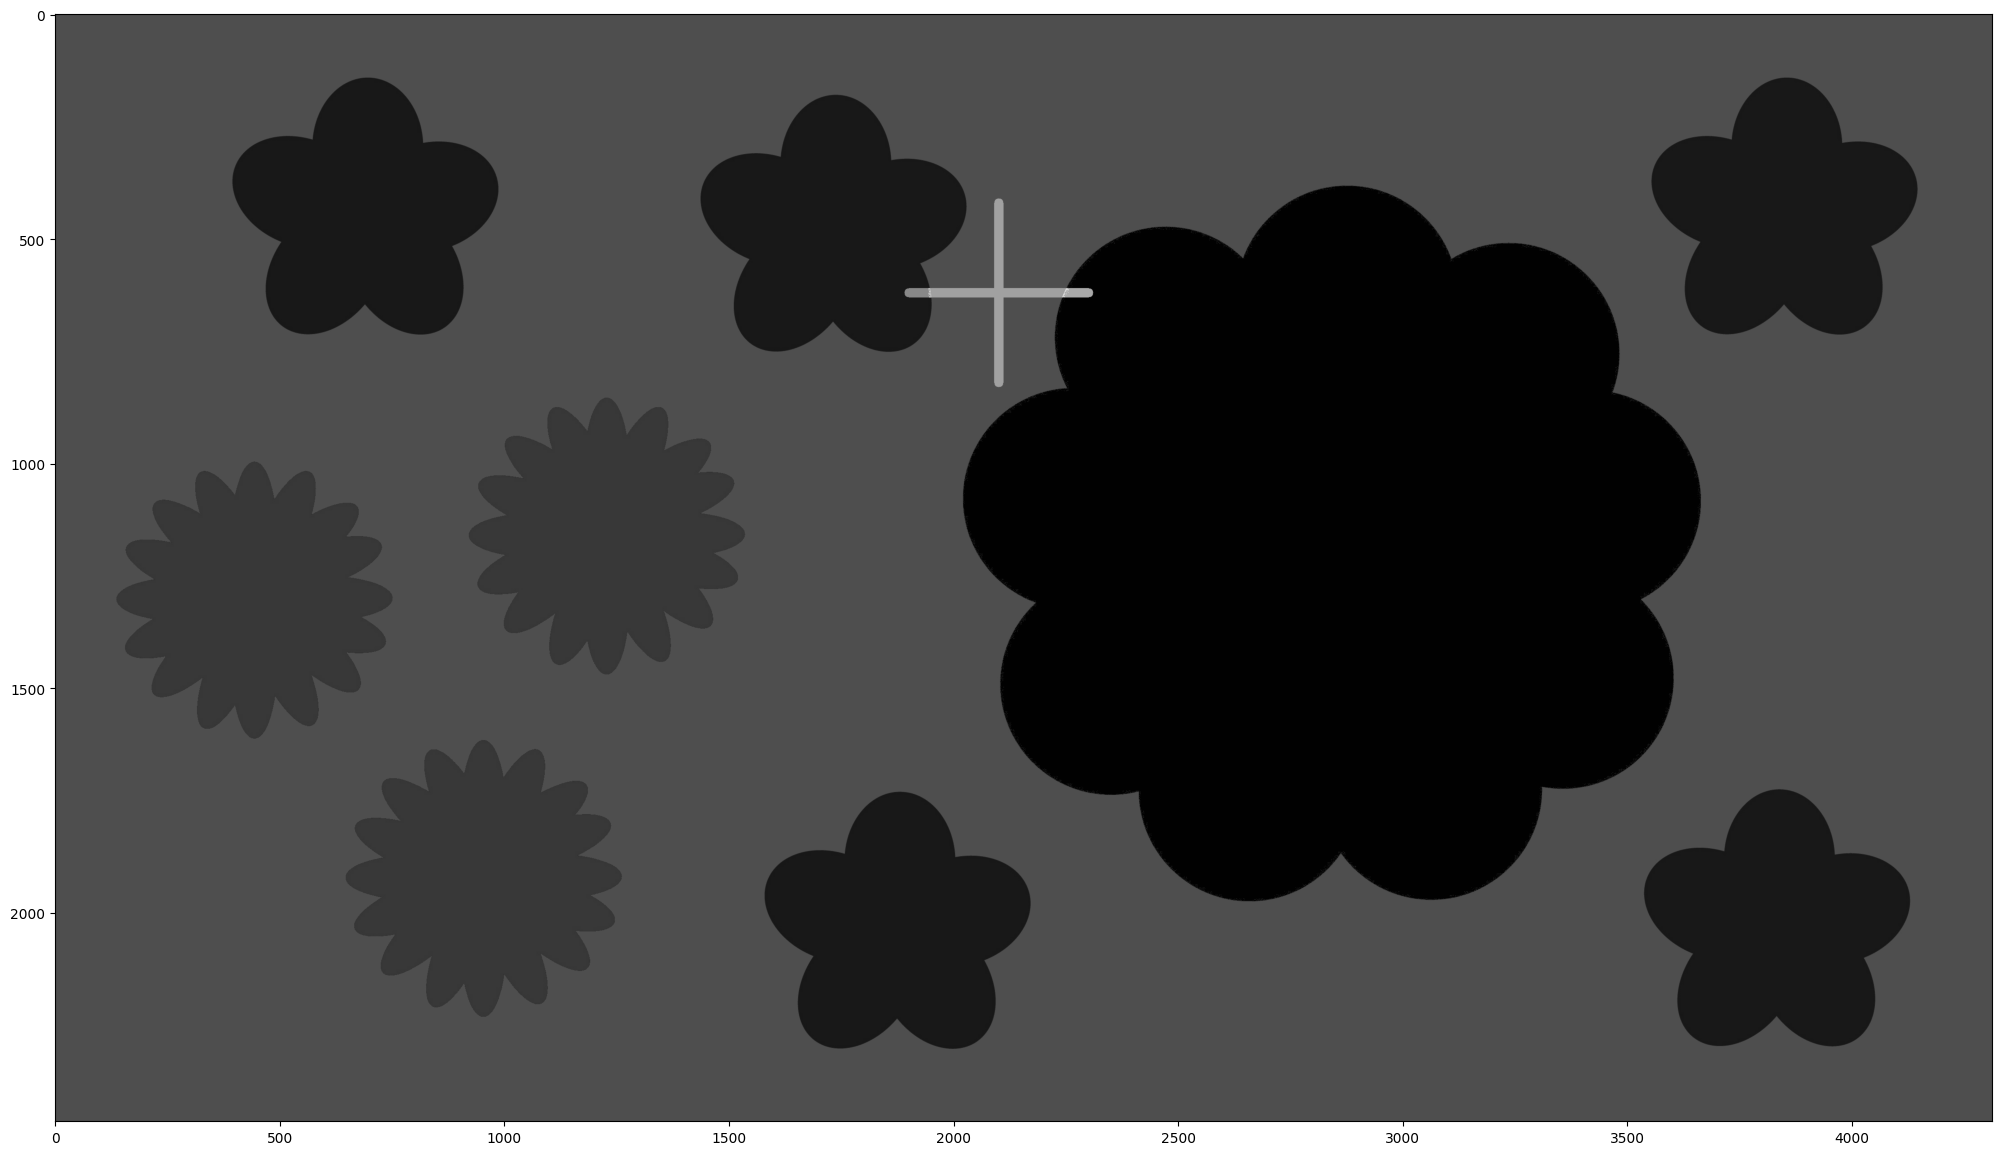

In [95]:
im3 = im1 - im2
plt.figure(figsize=(25, 25))
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
plt.imshow(im3, cmap='gray')